# MMM Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
import datetime as dt

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
ticker = 'MMM'

In [6]:
df = pd.read_csv(f"C:/Users/emrec/Desktop/djiastocks/{ticker}.csv", skiprows=2, header=0, index_col=0)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03,19.516685,39.454430,40.342808,39.323788,40.159908,2599386
2000-01-04,18.741192,37.886707,39.637333,37.886707,38.827339,3245705
2000-01-05,19.284039,38.984116,40.238293,38.095737,38.095737,4424482
2000-01-06,20.835028,42.119564,42.851170,39.428303,39.428303,7147057
2000-01-07,21.248619,42.955685,43.399876,41.779892,42.276337,4905035


## Visualizations

In [9]:
close_df = df[['Close']]
close_df.head()

,Close
Date,
2000-01-03,39.454430
2000-01-04,37.886707
2000-01-05,38.984116
2000-01-06,42.119564
2000-01-07,42.955685


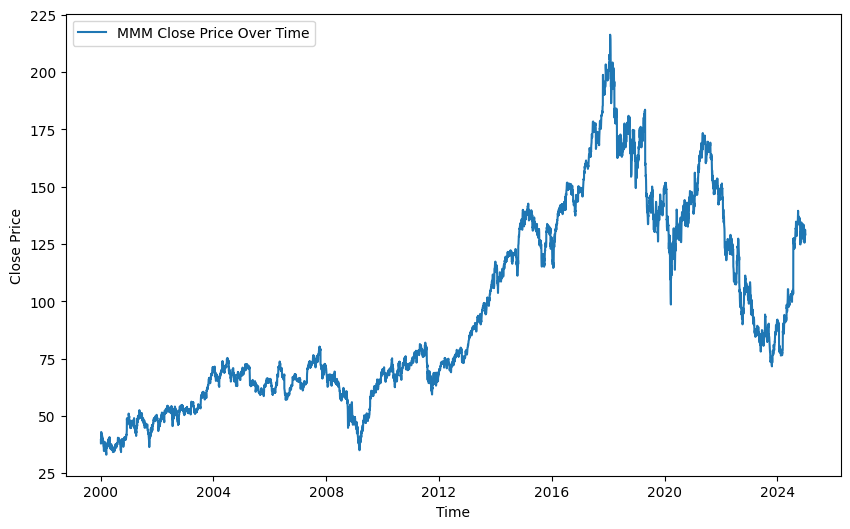

In [10]:
plt.figure(figsize=(10,6))
plt.plot(close_df.index, close_df.values, label=f'{ticker} Close Price Over Time')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

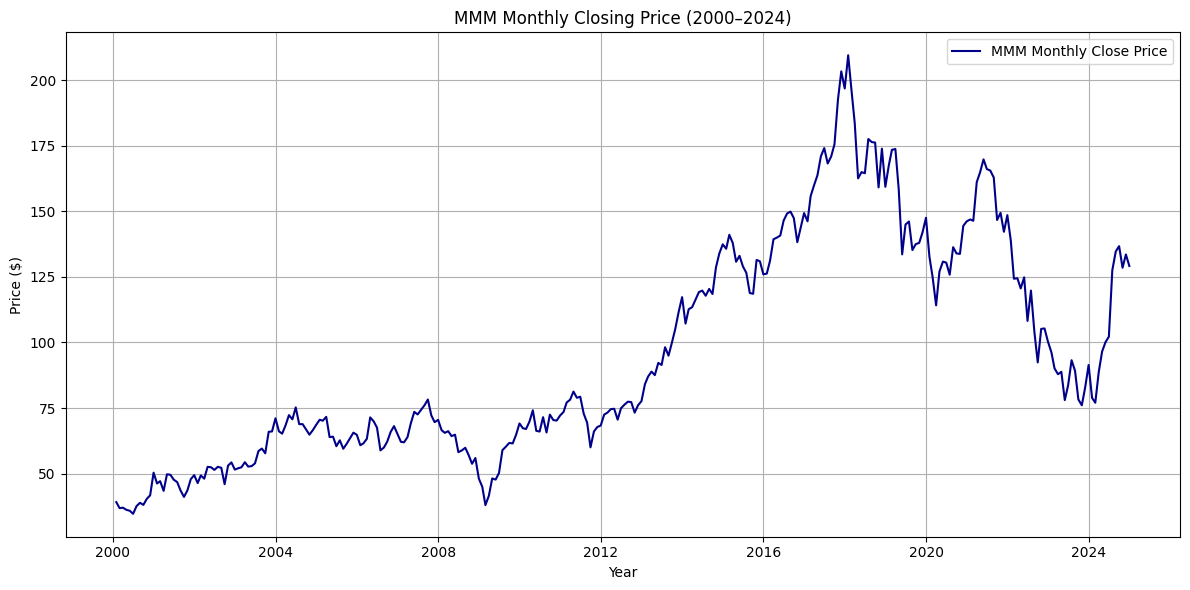

In [11]:
monthly_prices = close_df.resample('ME').last()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices, label=f'{ticker} Monthly Close Price', color='darkblue')
plt.title(f'{ticker} Monthly Closing Price (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Feature Engineering

In [13]:
close_df.head()

,Close
Date,
2000-01-03,39.454430
2000-01-04,37.886707
2000-01-05,38.984116
2000-01-06,42.119564
2000-01-07,42.955685


In [14]:
close_df['MA20'] = close_df['Close'].rolling(window=20).mean()
close_df['MA50'] = close_df['Close'].rolling(window=50).mean()

C:\Users\emrec\AppData\Local\Temp\ipykernel_39460\3931890909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['MA20'] = close_df['Close'].rolling(window=20).mean()
C:\Users\emrec\AppData\Local\Temp\ipykernel_39460\3931890909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['MA50'] = close_df['Close'].rolling(window=50).mean()


In [15]:
close_df['Momentum'] = close_df['Close'] - close_df['Close'].shift(63)


C:\Users\emrec\AppData\Local\Temp\ipykernel_39460\2868578188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['Momentum'] = close_df['Close'] - close_df['Close'].shift(63)


In [16]:
close_df['Volatility'] = close_df['Close'].rolling(window=20).std()


C:\Users\emrec\AppData\Local\Temp\ipykernel_39460\1108371884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['Volatility'] = close_df['Close'].rolling(window=20).std()


In [17]:
delta = close_df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
close_df['RSI'] = 100 - (100 / (1 + rs))

In [18]:
close_df.head()

,Close,MA20,MA50,Momentum,Volatility,RSI
Date,,,,,,
2000-01-03,39.454430,NaN,NaN,NaN,NaN,NaN
2000-01-04,37.886707,NaN,NaN,NaN,NaN,NaN
2000-01-05,38.984116,NaN,NaN,NaN,NaN,NaN
2000-01-06,42.119564,NaN,NaN,NaN,NaN,NaN
2000-01-07,42.955685,NaN,NaN,NaN,NaN,NaN


In [19]:
close_df = close_df.dropna()


In [20]:
close_df.head()

,Close,MA20,MA50,Momentum,Volatility,RSI
Date,,,,,,
2000-04-03,38.409283,35.915291,36.791388,-1.045147,1.645107,68.819193
2000-04-04,38.853470,36.128241,36.792956,0.966763,1.738157,66.534653
2000-04-05,38.095737,36.307223,36.790866,-0.888378,1.747689,55.505629
2000-04-06,39.036369,36.567204,36.766305,-3.083195,1.747587,63.452907
2000-04-07,38.304768,36.778847,36.727634,-4.650917,1.684666,58.114043


In [21]:
monthly_df = close_df.resample('ME').last()

In [22]:
monthly_df['MonthlyReturn'] = monthly_df['Close'].pct_change().shift(-1)

In [23]:
monthly_df = monthly_df.dropna()

In [24]:
monthly_df = monthly_df.sort_index()

In [25]:
monthly_df.head()

,Close,MA20,MA50,Momentum,Volatility,RSI,MonthlyReturn
Date,,,,,,,
2000-04-30,36.214466,38.346572,37.058424,-2.351589,1.155041,41.031381,-0.010101
2000-05-31,35.848663,35.950564,37.096050,-0.156773,0.645160,49.577475,-0.032070
2000-06-30,34.698997,35.136327,35.872047,-2.325459,0.761658,52.503798,0.085090
2000-07-31,37.651546,36.778846,35.873093,1.306438,0.698716,54.205613,0.032790
2000-08-31,38.886131,39.418178,37.726537,3.638432,0.773539,30.818602,-0.020326


## Random Forest

### Random Forest with Original Features

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
X_rf = monthly_df[['Close', 'MA20', 'MA50','Momentum', 'Volatility','RSI']]
y_rf = monthly_df['MonthlyReturn']

In [30]:
train_size = int(len(X_rf) * 0.7)
val_size = int(len(X_rf) * 0.15)

In [31]:
X_train_rf = X_rf.iloc[:train_size]
y_train_rf = y_rf.iloc[:train_size]

X_val_rf = X_rf.iloc[train_size:train_size+val_size]
y_val_rf = y_rf.iloc[train_size:train_size+val_size]

X_test_rf = X_rf.iloc[train_size+val_size:]
y_test_rf = y_rf.iloc[train_size+val_size:]

In [32]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_rf, y_train_rf)
y_val_pred = rf_model.predict(X_val_rf)


In [33]:
mse_rf = mean_squared_error(y_val_rf, y_val_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val_rf, y_val_pred)
r2_rf = r2_score(y_val_rf, y_val_pred)
da_rf = ( (y_val_pred > 0) == (y_val_rf > 0) ).mean()

print("📊 Random Forest")
print(f"  R²:   {r2_rf:.4f}")
print(f"  MSE:  {mse_rf:.6f}")
print(f"  RMSE: {rmse_rf:.6f}")
print(f"  MAE:  {mae_rf:.6f}")
print(f"  Directional Accuracy: {da_rf:.4f}")

📊 Random Forest
  R²:   0.0225
  MSE:  0.004066
  RMSE: 0.063762
  MAE:  0.051566
  Directional Accuracy: 0.5000


### Hyperparameter tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#Parameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

#Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30, 
    scoring='neg_root_mean_squared_error',  
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Train + validation
X_train_val = pd.concat([X_train_rf, X_val_rf])
y_train_val = pd.concat([y_train_rf, y_val_rf])

#Fit
random_search.fit(X_train_val, y_train_val)

#Best parameters
print("\n✅ Best parameters :", random_search.best_params_)
print(f"📉 Lowest RMSE: {-random_search.best_score_:.6f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constra


✅ Best parameters : {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
📉 Lowest RMSE: 0.058014


### Testing

In [37]:
#Train + Validation
X_train_val_rf = pd.concat([X_train_rf, X_val_rf])
y_train_val_rf = pd.concat([y_train_rf, y_val_rf])

#Model with optimal parameters
rf_model_final = RandomForestRegressor(
 **random_search.best_params_,              
    random_state=42,
    n_jobs=-1
)

#Training
rf_model_final.fit(X_train_val_rf, y_train_val_rf)

#Test set
y_test_pred_rf = rf_model_final.predict(X_test_rf)

#Evaluation
r2_rf_final = r2_score(y_test_rf, y_test_pred_rf)
mse_rf_final = mean_squared_error(y_test_rf, y_test_pred_rf)
rmse_rf_final = np.sqrt(mse_rf_final)
mae_rf_final = mean_absolute_error(y_test_rf, y_test_pred_rf)
da_rf_final = np.mean(np.sign(y_test_pred_rf) == np.sign(y_test_rf))

print("📊 Random Forest (All Features) – Final Test Results")
print(f"  R²:   {r2_rf_final:.4f}")
print(f"  MSE:  {mse_rf_final:.6f}")
print(f"  RMSE: {rmse_rf_final:.6f}")
print(f"  MAE:  {mae_rf_final:.6f}")
print(f"  Directional Accuracy: {da_rf_final:.4f}")


📊 Random Forest (All Features) – Final Test Results
  R²:   -0.0054
  MSE:  0.007000
  RMSE: 0.083663
  MAE:  0.067214
  Directional Accuracy: 0.4667


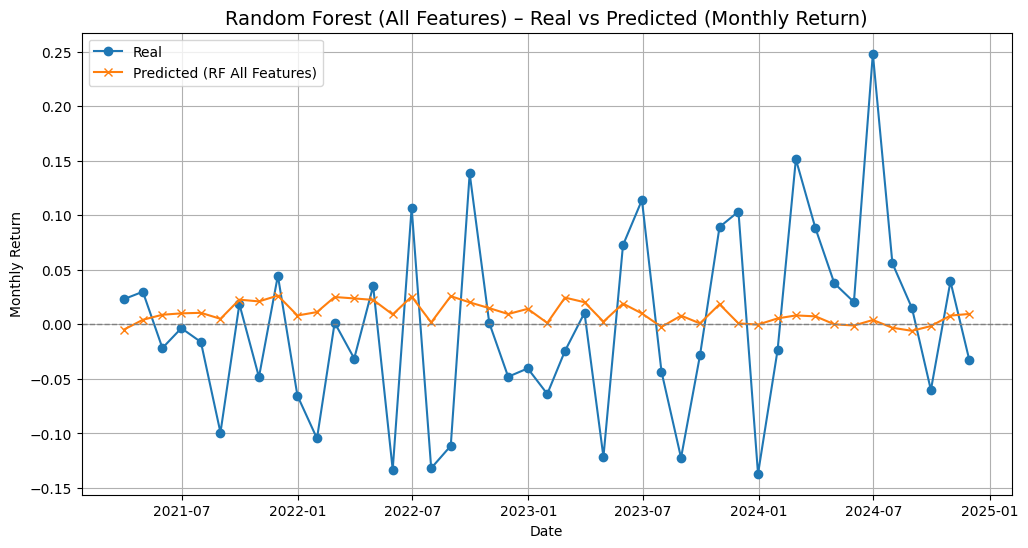

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rf.index, y_test_rf.values, label='Real', marker='o')
plt.plot(y_test_rf.index, y_test_pred_rf, label='Predicted (RF All Features)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Random Forest (All Features) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


### Lagged Returns

In [40]:
monthly_df['ret_lag1'] = monthly_df['MonthlyReturn'].shift(1)
monthly_df['ret_lag2'] = monthly_df['MonthlyReturn'].shift(2)
monthly_df['ret_lag3'] = monthly_df['MonthlyReturn'].shift(3)

In [41]:
monthly_df.head()

,Close,MA20,MA50,Momentum,Volatility,RSI,MonthlyReturn,ret_lag1,ret_lag2,ret_lag3
Date,,,,,,,,,,
2000-04-30,36.214466,38.346572,37.058424,-2.351589,1.155041,41.031381,-0.010101,NaN,NaN,NaN
2000-05-31,35.848663,35.950564,37.096050,-0.156773,0.645160,49.577475,-0.032070,-0.010101,NaN,NaN
2000-06-30,34.698997,35.136327,35.872047,-2.325459,0.761658,52.503798,0.085090,-0.032070,-0.010101,NaN
2000-07-31,37.651546,36.778846,35.873093,1.306438,0.698716,54.205613,0.032790,0.085090,-0.032070,-0.010101
2000-08-31,38.886131,39.418178,37.726537,3.638432,0.773539,30.818602,-0.020326,0.032790,0.085090,-0.032070


In [42]:
features_lag = ['Close', 'MA20', 'MA50', 'Momentum','RSI', 'Volatility', 'ret_lag1', 'ret_lag2', 'ret_lag3']
data_rf_lag = monthly_df[features_lag + ['MonthlyReturn']].dropna()

In [43]:
X_rf_lag = data_rf_lag[features_lag]
y_rf_lag = data_rf_lag['MonthlyReturn']

In [44]:
train_size = int(len(X_rf_lag) * 0.7)
val_size = int(len(X_rf_lag) * 0.15)

X_train_rf_l = X_rf_lag.iloc[:train_size]
y_train_rf_l = y_rf_lag.iloc[:train_size]

X_val_rf_l = X_rf_lag.iloc[train_size:train_size+val_size]
y_val_rf_l = y_rf_lag.iloc[train_size:train_size+val_size]

X_test_rf_l = X_rf_lag.iloc[train_size+val_size:]
y_test_rf_l = y_rf_lag.iloc[train_size+val_size:]

In [45]:
rf_model_l = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_model_l.fit(X_train_rf_l, y_train_rf_l)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [46]:
y_val_pred_rf_l = rf_model_l.predict(X_val_rf_l)

In [47]:
r2_rf_l = r2_score(y_val_rf_l, y_val_pred_rf_l)
mse_rf_l = mean_squared_error(y_val_rf_l, y_val_pred_rf_l)
rmse_rf_l = np.sqrt(mse_rf_l)
mae_rf_l = mean_absolute_error(y_val_rf_l, y_val_pred_rf_l)
da_rf_l = np.mean(np.sign(y_val_pred_rf_l) == np.sign(y_val_rf_l))

print("📊 Random Forest – Lagged – Validation Set")
print(f"  R²:   {r2_rf_l:.4f}")
print(f"  MSE:  {mse_rf_l:.6f}")
print(f"  RMSE: {rmse_rf_l:.6f}")
print(f"  MAE:  {mae_rf_l:.6f}")
print(f"  Directional Accuracy: {da_rf_l:.4f}")

📊 Random Forest – Lagged – Validation Set
  R²:   0.0006
  MSE:  0.004249
  RMSE: 0.065181
  MAE:  0.052076
  Directional Accuracy: 0.4651


### Hyperparameter Tuning 

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

#Randomized Search
random_search_lag = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,  # Kaç kombinasyon denenecek
    scoring='neg_root_mean_squared_error',  # RMSE
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

X_train_val_rf_l = pd.concat([X_train_rf_l, X_val_rf_l])
y_train_val_rf_l = pd.concat([y_train_rf_l, y_val_rf_l])

#Fit tuning
random_search_lag.fit(X_train_val_rf_l, y_train_val_rf_l)

#Best parameters
print("\n✅ Best parameters:", random_search_lag.best_params_)
print(f"📉 Lowest RMSE: {-random_search_lag.best_score_:.6f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\emrec\anaconda3\envs\lstm-env\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constra


✅ Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
📉 Lowest RMSE: 0.057770


### Testing

In [51]:
#Training + validation
X_train_val_rf_l = pd.concat([X_train_rf_l, X_val_rf_l])
y_train_val_rf_l = pd.concat([y_train_rf_l, y_val_rf_l])

#Optimal parameters
rf_model_l_final = RandomForestRegressor(
 **random_search_lag.best_params_,
    random_state=42,
    n_jobs=-1
)

#Training
rf_model_l_final.fit(X_train_val_rf_l, y_train_val_rf_l)

#Test set
y_test_pred_rf_l = rf_model_l_final.predict(X_test_rf_l)

#Evaluation
r2_rf_l_final = r2_score(y_test_rf_l, y_test_pred_rf_l)
mse_rf_l_final = mean_squared_error(y_test_rf_l, y_test_pred_rf_l)
rmse_rf_l_final = np.sqrt(mse_rf_l_final)
mae_rf_l_final = mean_absolute_error(y_test_rf_l, y_test_pred_rf_l)
da_rf_l_final = np.mean(np.sign(y_test_pred_rf_l) == np.sign(y_test_rf_l))

print("📊 Random Forest (Reduced + Lagged) – Final Test Results")
print(f"  R²:   {r2_rf_l_final:.4f}")
print(f"  MSE:  {mse_rf_l_final:.6f}")
print(f"  RMSE: {rmse_rf_l_final:.6f}")
print(f"  MAE:  {mae_rf_l_final:.6f}")
print(f"  Directional Accuracy: {da_rf_l_final:.4f}")

📊 Random Forest (Reduced + Lagged) – Final Test Results
  R²:   -0.0199
  MSE:  0.007101
  RMSE: 0.084265
  MAE:  0.067027
  Directional Accuracy: 0.4444


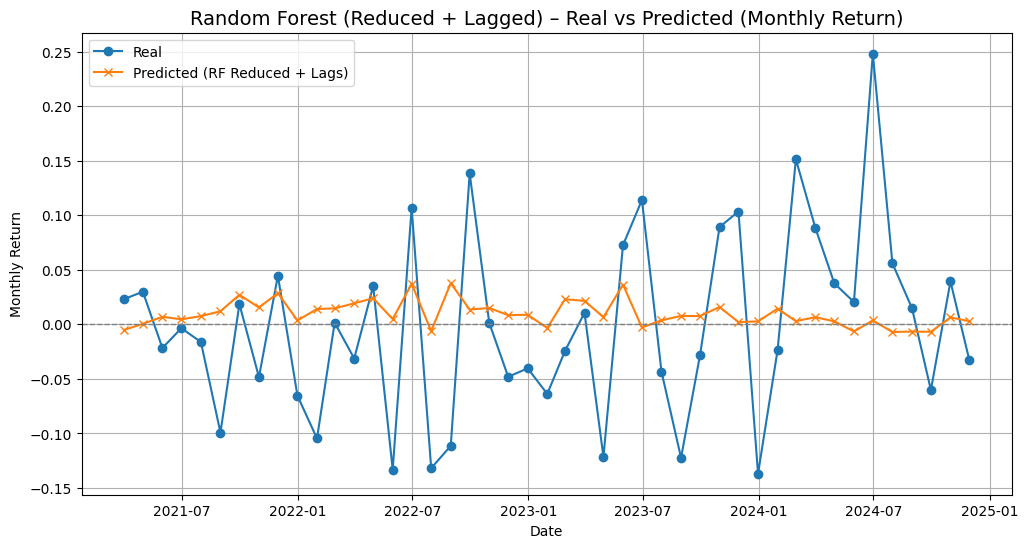

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rf_l.index, y_test_rf_l.values, label='Real', marker='o')
plt.plot(y_test_rf_l.index, y_test_pred_rf_l, label='Predicted (RF Reduced + Lags)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Random Forest (Reduced + Lagged) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

### XGBoost with Original Features 

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

X_xgb = monthly_df[['Close', 'MA20', 'MA50', 'Momentum', 'Volatility', 'RSI']]
y_xgb = monthly_df['MonthlyReturn']

# Train / Validation / Test split
train_size = int(len(X_xgb) * 0.7)
val_size = int(len(X_xgb) * 0.15)

X_train_xgb = X_xgb.iloc[:train_size]
y_train_xgb = y_xgb.iloc[:train_size]

X_val_xgb = X_xgb.iloc[train_size:train_size+val_size]
y_val_xgb = y_xgb.iloc[train_size:train_size+val_size]

X_test_xgb = X_xgb.iloc[train_size+val_size:]
y_test_xgb = y_xgb.iloc[train_size+val_size:]

# Model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_xgb, y_train_xgb)
y_val_pred_xgb = xgb_model.predict(X_val_xgb)

In [56]:
#Evaluation
r2_xgb = r2_score(y_val_xgb, y_val_pred_xgb)
mse_xgb = mean_squared_error(y_val_xgb, y_val_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_val_xgb, y_val_pred_xgb)
da_xgb = np.mean(np.sign(y_val_pred_xgb) == np.sign(y_val_xgb))

print("📊 XGBoost (All Features) – Validation Set")
print(f"  R²:   {r2_xgb:.4f}")
print(f"  MSE:  {mse_xgb:.6f}")
print(f"  RMSE: {rmse_xgb:.6f}")
print(f"  MAE:  {mae_xgb:.6f}")
print(f"  Directional Accuracy: {da_xgb:.4f}")

📊 XGBoost (All Features) – Validation Set
  R²:   -0.0664
  MSE:  0.004436
  RMSE: 0.066600
  MAE:  0.055799
  Directional Accuracy: 0.4318


### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

#Parameters
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

#Randomized Search)
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=30,  # Kaç kombinasyon denenecek
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Train + validation
X_train_val_xgb = pd.concat([X_train_xgb, X_val_xgb])
y_train_val_xgb = pd.concat([y_train_xgb, y_val_xgb])

#Fit tuning
random_search_xgb.fit(X_train_val_xgb, y_train_val_xgb)

#Best parameters
print("\n✅ Best parameters:", random_search_xgb.best_params_)
print(f"📉 Lowest RMSE: {-random_search_xgb.best_score_:.6f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
📉 Lowest RMSE: 0.057032


### Testing

In [60]:
#Train + Validation
X_train_val_xgb = pd.concat([X_train_xgb, X_val_xgb])
y_train_val_xgb = pd.concat([y_train_xgb, y_val_xgb])

#Optimal parameters
xgb_model_final = XGBRegressor(
    **random_search_xgb.best_params_,
    random_state=42,
    n_jobs=-1
)

#Training
xgb_model_final.fit(X_train_val_xgb, y_train_val_xgb)

#Test set
y_test_pred_xgb = xgb_model_final.predict(X_test_xgb)

In [61]:
r2_xgb_final = r2_score(y_test_xgb, y_test_pred_xgb)
mse_xgb_final = mean_squared_error(y_test_xgb, y_test_pred_xgb)
rmse_xgb_final = np.sqrt(mse_xgb_final)
mae_xgb_final = mean_absolute_error(y_test_xgb, y_test_pred_xgb)
da_xgb_final = np.mean(np.sign(y_test_pred_xgb) == np.sign(y_test_xgb))

print("📊 XGBoost (All Features) – Final Test Results")
print(f"  R²:   {r2_xgb_final:.4f}")
print(f"  MSE:  {mse_xgb_final:.6f}")
print(f"  RMSE: {rmse_xgb_final:.6f}")
print(f"  MAE:  {mae_xgb_final:.6f}")
print(f"  Directional Accuracy: {da_xgb_final:.4f}")

📊 XGBoost (All Features) – Final Test Results
  R²:   -0.0238
  MSE:  0.007128
  RMSE: 0.084426
  MAE:  0.067411
  Directional Accuracy: 0.4667


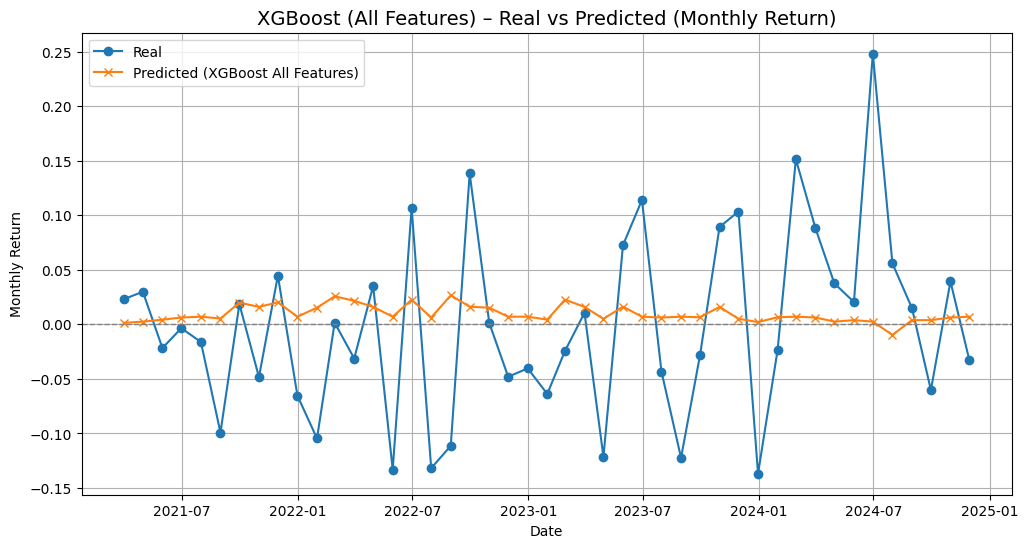

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test_xgb.index, y_test_xgb.values, label='Real', marker='o')
plt.plot(y_test_xgb.index, y_test_pred_xgb, label='Predicted (XGBoost All Features)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('XGBoost (All Features) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


### Lagged Returns

In [64]:
# Lag features
features_lag_xgb = ['Close','MA20', 'MA50', 'Momentum', 'RSI', 'Volatility', 'ret_lag1', 'ret_lag2', 'ret_lag3']
data_xgb_lag = monthly_df[features_lag_xgb + ['MonthlyReturn']].dropna()

X_xgb_lag = data_xgb_lag[features_lag_xgb]
y_xgb_lag = data_xgb_lag['MonthlyReturn']

# Train / Validation / Test split
train_size = int(len(X_xgb_lag) * 0.7)
val_size = int(len(X_xgb_lag) * 0.15)

X_train_xgb_l = X_xgb_lag.iloc[:train_size]
y_train_xgb_l = y_xgb_lag.iloc[:train_size]

X_val_xgb_l = X_xgb_lag.iloc[train_size:train_size+val_size]
y_val_xgb_l = y_xgb_lag.iloc[train_size:train_size+val_size]

X_test_xgb_l = X_xgb_lag.iloc[train_size+val_size:]
y_test_xgb_l = y_xgb_lag.iloc[train_size+val_size:]

#Model 
xgb_model_l = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

#Training
xgb_model_l.fit(X_train_xgb_l, y_train_xgb_l)

#Validation 
y_val_pred_xgb_l = xgb_model_l.predict(X_val_xgb_l)


In [65]:
r2_xgb_l = r2_score(y_val_xgb_l, y_val_pred_xgb_l)
mse_xgb_l = mean_squared_error(y_val_xgb_l, y_val_pred_xgb_l)
rmse_xgb_l = np.sqrt(mse_xgb_l)
mae_xgb_l = mean_absolute_error(y_val_xgb_l, y_val_pred_xgb_l)
da_xgb_l = np.mean(np.sign(y_val_pred_xgb_l) == np.sign(y_val_xgb_l))

print("📊 XGBoost (Lagged Returns) – Validation Set")
print(f"  R²:   {r2_xgb_l:.4f}")
print(f"  MSE:  {mse_xgb_l:.6f}")
print(f"  RMSE: {rmse_xgb_l:.6f}")
print(f"  MAE:  {mae_xgb_l:.6f}")
print(f"  Directional Accuracy: {da_xgb_l:.4f}")

📊 XGBoost (Lagged Returns) – Validation Set
  R²:   -0.1376
  MSE:  0.004836
  RMSE: 0.069542
  MAE:  0.054616
  Directional Accuracy: 0.4651


### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

#Parameters
param_grid_xgb_lag = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Model
xgb_lag = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

#Randomized Search
random_search_xgb_lag = RandomizedSearchCV(
    estimator=xgb_lag,
    param_distributions=param_grid_xgb_lag,
    n_iter=30,  # Kaç kombinasyon denenecek
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
#Train + validation
X_train_val_xgb_l = pd.concat([X_train_xgb_l, X_val_xgb_l])
y_train_val_xgb_l = pd.concat([y_train_xgb_l, y_val_xgb_l])

#Fit tuning
random_search_xgb_lag.fit(X_train_val_xgb_l, y_train_val_xgb_l)

print("\n✅ Best parameters:", random_search_xgb_lag.best_params_)
print(f"📉 Lowest RMSE: {-random_search_xgb_lag.best_score_:.6f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
📉 Lowest RMSE: 0.057252


### Testing

In [69]:
#Train + Validation
X_train_val_xgb_l = pd.concat([X_train_xgb_l, X_val_xgb_l])
y_train_val_xgb_l = pd.concat([y_train_xgb_l, y_val_xgb_l])

#Optimal parameters
xgb_model_lag_final = XGBRegressor(
    **random_search_xgb_lag.best_params_,
    random_state=42,
    n_jobs=-1
)

#Training
xgb_model_lag_final.fit(X_train_val_xgb_l, y_train_val_xgb_l)

#Testing
y_test_pred_xgb_l = xgb_model_lag_final.predict(X_test_xgb_l)

In [70]:
#Evaluation
r2_xgb_l_final = r2_score(y_test_xgb_l, y_test_pred_xgb_l)
mse_xgb_l_final = mean_squared_error(y_test_xgb_l, y_test_pred_xgb_l)
rmse_xgb_l_final = np.sqrt(mse_xgb_l_final)
mae_xgb_l_final = mean_absolute_error(y_test_xgb_l, y_test_pred_xgb_l)
da_xgb_l_final = np.mean(np.sign(y_test_pred_xgb_l) == np.sign(y_test_xgb_l))

print("📊 XGBoost (Lagged Returns) – Final Test Results")
print(f"  R²:   {r2_xgb_l_final:.4f}")
print(f"  MSE:  {mse_xgb_l_final:.6f}")
print(f"  RMSE: {rmse_xgb_l_final:.6f}")
print(f"  MAE:  {mae_xgb_l_final:.6f}")
print(f"  Directional Accuracy: {da_xgb_l_final:.4f}")

📊 XGBoost (Lagged Returns) – Final Test Results
  R²:   -0.0289
  MSE:  0.007163
  RMSE: 0.084635
  MAE:  0.067574
  Directional Accuracy: 0.4667


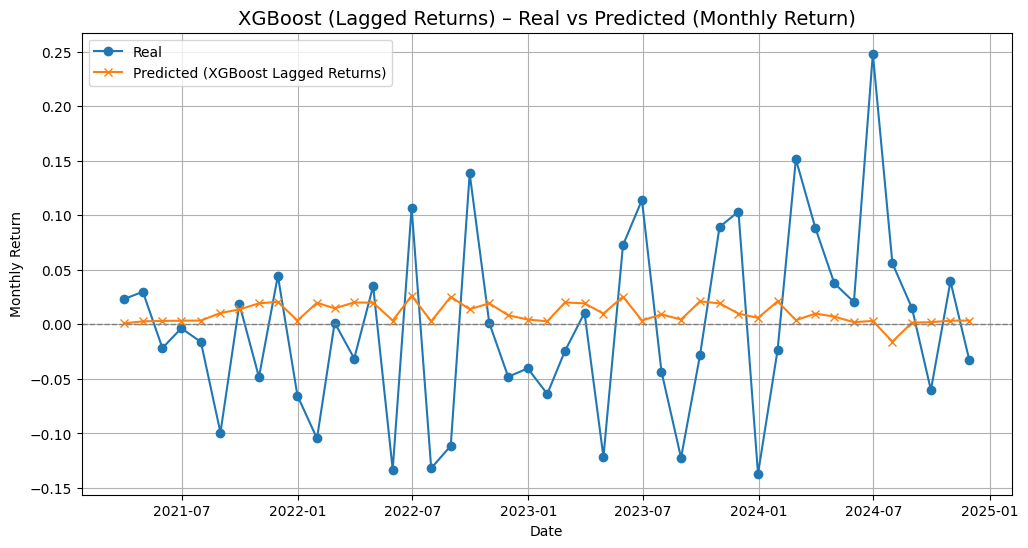

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test_xgb_l.index, y_test_xgb_l.values, label='Real', marker='o')
plt.plot(y_test_xgb_l.index, y_test_pred_xgb_l, label='Predicted (XGBoost Lagged Returns)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('XGBoost (Lagged Returns) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Machines

### SVM with Original Features 

In [74]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

X_svr = monthly_df[['Close', 'MA20', 'MA50', 'Momentum', 'Volatility', 'RSI']]
y_svr = monthly_df['MonthlyReturn']

#Train / Validation / Test split
train_size = int(len(X_svr) * 0.7)
val_size = int(len(X_svr) * 0.15)

X_train_svr = X_svr.iloc[:train_size]
y_train_svr = y_svr.iloc[:train_size]

X_val_svr = X_svr.iloc[train_size:train_size+val_size]
y_val_svr = y_svr.iloc[train_size:train_size+val_size]

X_test_svr = X_svr.iloc[train_size+val_size:]
y_test_svr = y_svr.iloc[train_size+val_size:]

#SVR pipeline
svr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

#Training
svr_model.fit(X_train_svr, y_train_svr)

#Validation
y_val_pred_svr = svr_model.predict(X_val_svr)

In [75]:
#Evaluation (Validation)
r2_svr = r2_score(y_val_svr, y_val_pred_svr)
mse_svr = mean_squared_error(y_val_svr, y_val_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_val_svr, y_val_pred_svr)
da_svr = np.mean(np.sign(y_val_pred_svr) == np.sign(y_val_svr))

print("📊 SVR (All Features) – Validation Set")
print(f"  R²:   {r2_svr:.4f}")
print(f"  MSE:  {mse_svr:.6f}")
print(f"  RMSE: {rmse_svr:.6f}")
print(f"  MAE:  {mae_svr:.6f}")
print(f"  Directional Accuracy: {da_svr:.4f}")

📊 SVR (All Features) – Validation Set
  R²:   -0.7251
  MSE:  0.007175
  RMSE: 0.084706
  MAE:  0.066966
  Directional Accuracy: 0.5455


### Hyperparameter Tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

#Pipeline (scaling + SVR)
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid_svr = {
    'svr__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svr__C': [1, 5, 10, 50, 100, 200, 500],
    'svr__epsilon': [0.001, 0.005, 0.01, 0.05, 0.1],
    'svr__gamma': ['scale', 'auto', 0.01, 0.05, 0.1, 0.5]
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Randomized Search
random_search_svr = RandomizedSearchCV(
    estimator=svr_pipeline,
    param_distributions=param_grid_svr,
    n_iter=40, 
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Train + validation
X_train_val_svr = pd.concat([X_train_svr, X_val_svr])
y_train_val_svr = pd.concat([y_train_svr, y_val_svr])

#Fit tuning
random_search_svr.fit(X_train_val_svr, y_train_val_svr)

# Best parameters
print("\n✅ Best parameters:", random_search_svr.best_params_)
print(f"📉 Lowest RMSE: {-random_search_svr.best_score_:.6f}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ Best parameters: {'svr__kernel': 'rbf', 'svr__gamma': 0.5, 'svr__epsilon': 0.1, 'svr__C': 500}
📉 Lowest RMSE: 0.059884


### Testing

In [79]:
#Train + Validation
X_train_val_svr = pd.concat([X_train_svr, X_val_svr])
y_train_val_svr = pd.concat([y_train_svr, y_val_svr])

#Optimal parameter pipeline
svr_model_final = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(**{k.replace('svr__', ''): v for k, v in random_search_svr.best_params_.items()}))
])

#Training
svr_model_final.fit(X_train_val_svr, y_train_val_svr)

#Testing
y_test_pred_svr = svr_model_final.predict(X_test_svr)

In [80]:
r2_svr_final = r2_score(y_test_svr, y_test_pred_svr)
mse_svr_final = mean_squared_error(y_test_svr, y_test_pred_svr)
rmse_svr_final = np.sqrt(mse_svr_final)
mae_svr_final = mean_absolute_error(y_test_svr, y_test_pred_svr)
da_svr_final = np.mean(np.sign(y_test_pred_svr) == np.sign(y_test_svr))

print("📊 SVR (All Features) – Final Test Results")
print(f"  R²:   {r2_svr_final:.4f}")
print(f"  MSE:  {mse_svr_final:.6f}")
print(f"  RMSE: {rmse_svr_final:.6f}")
print(f"  MAE:  {mae_svr_final:.6f}")
print(f"  Directional Accuracy: {da_svr_final:.4f}")


📊 SVR (All Features) – Final Test Results
  R²:   -0.2103
  MSE:  0.008426
  RMSE: 0.091792
  MAE:  0.070768
  Directional Accuracy: 0.5111


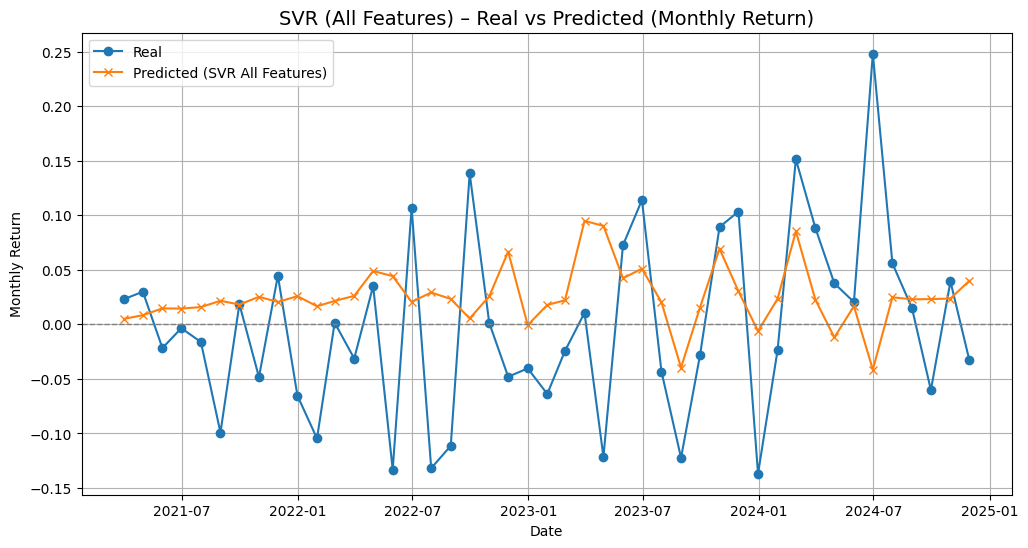

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test_svr.index, y_test_svr.values, label='Real', marker='o')
plt.plot(y_test_svr.index, y_test_pred_svr, label='Predicted (SVR All Features)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('SVR (All Features) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


### Lagged Returns

In [83]:
#Lag features
features_lag_svr = ['Close', 'Momentum', 'RSI', 'Volatility', 'ret_lag1', 'ret_lag2', 'ret_lag3']
data_svr_lag = monthly_df[features_lag_svr + ['MonthlyReturn']].dropna()

X_svr_lag = data_svr_lag[features_lag_svr]
y_svr_lag = data_svr_lag['MonthlyReturn']

#Train / Validation / Test split
train_size = int(len(X_svr_lag) * 0.7)
val_size = int(len(X_svr_lag) * 0.15)

X_train_svr_l = X_svr_lag.iloc[:train_size]
y_train_svr_l = y_svr_lag.iloc[:train_size]

X_val_svr_l = X_svr_lag.iloc[train_size:train_size+val_size]
y_val_svr_l = y_svr_lag.iloc[train_size:train_size+val_size]

X_test_svr_l = X_svr_lag.iloc[train_size+val_size:]
y_test_svr_l = y_svr_lag.iloc[train_size+val_size:]

#SVR pipeline
svr_model_l = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

#Training
svr_model_l.fit(X_train_svr_l, y_train_svr_l)

#Validation
y_val_pred_svr_l = svr_model_l.predict(X_val_svr_l)

In [84]:
r2_svr_l = r2_score(y_val_svr_l, y_val_pred_svr_l)
mse_svr_l = mean_squared_error(y_val_svr_l, y_val_pred_svr_l)
rmse_svr_l = np.sqrt(mse_svr_l)
mae_svr_l = mean_absolute_error(y_val_svr_l, y_val_pred_svr_l)
da_svr_l = np.mean(np.sign(y_val_pred_svr_l) == np.sign(y_val_svr_l))

print("📊 SVR (Lagged Returns) – Validation Set")
print(f"  R²:   {r2_svr_l:.4f}")
print(f"  MSE:  {mse_svr_l:.6f}")
print(f"  RMSE: {rmse_svr_l:.6f}")
print(f"  MAE:  {mae_svr_l:.6f}")
print(f"  Directional Accuracy: {da_svr_l:.4f}")

📊 SVR (Lagged Returns) – Validation Set
  R²:   -0.1803
  MSE:  0.005018
  RMSE: 0.070835
  MAE:  0.055300
  Directional Accuracy: 0.4651


### Hyperparameter Tuning

In [86]:
#Pipeline (scaling + SVR)
svr_pipeline_lag = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid_svr_lag = {
    'svr__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 50, 100, 200],
    'svr__epsilon': [0.001, 0.01, 0.1, 0.2, 0.5],
    'svr__gamma': ['scale', 'auto']
}

#Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Randomized Search
random_search_svr_lag = RandomizedSearchCV(
    estimator=svr_pipeline_lag,
    param_distributions=param_grid_svr_lag,
    n_iter=30,  # Kaç kombinasyon denenecek
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Train + validation
X_train_val_svr_l = pd.concat([X_train_svr_l, X_val_svr_l])
y_train_val_svr_l = pd.concat([y_train_svr_l, y_val_svr_l])

#Fit tuning
random_search_svr_lag.fit(X_train_val_svr_l, y_train_val_svr_l)

#Best parameters
print("\n✅ Best parameters:", random_search_svr_lag.best_params_)
print(f"📉 Lowest RMSE: {-random_search_svr_lag.best_score_:.6f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best parameters: {'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 0.1, 'svr__C': 100}
📉 Lowest RMSE: 0.060466


### Testing

In [88]:
#Train + Validation
X_train_val_svr_l = pd.concat([X_train_svr_l, X_val_svr_l])
y_train_val_svr_l = pd.concat([y_train_svr_l, y_val_svr_l])

#Optimal parameters
svr_model_lag_final = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(**{k.replace('svr__', ''): v for k, v in random_search_svr_lag.best_params_.items()}))
])

svr_model_lag_final.fit(X_train_val_svr_l, y_train_val_svr_l)

#Testing
y_test_pred_svr_l = svr_model_lag_final.predict(X_test_svr_l)

In [89]:
r2_svr_l_final = r2_score(y_test_svr_l, y_test_pred_svr_l)
mse_svr_l_final = mean_squared_error(y_test_svr_l, y_test_pred_svr_l)
rmse_svr_l_final = np.sqrt(mse_svr_l_final)
mae_svr_l_final = mean_absolute_error(y_test_svr_l, y_test_pred_svr_l)
da_svr_l_final = np.mean(np.sign(y_test_pred_svr_l) == np.sign(y_test_svr_l))

print("📊 SVR (Lagged Returns) – Final Test Results")
print(f"  R²:   {r2_svr_l_final:.4f}")
print(f"  MSE:  {mse_svr_l_final:.6f}")
print(f"  RMSE: {rmse_svr_l_final:.6f}")
print(f"  MAE:  {mae_svr_l_final:.6f}")
print(f"  Directional Accuracy: {da_svr_l_final:.4f}")

📊 SVR (Lagged Returns) – Final Test Results
  R²:   -0.1063
  MSE:  0.007702
  RMSE: 0.087760
  MAE:  0.068594
  Directional Accuracy: 0.4889


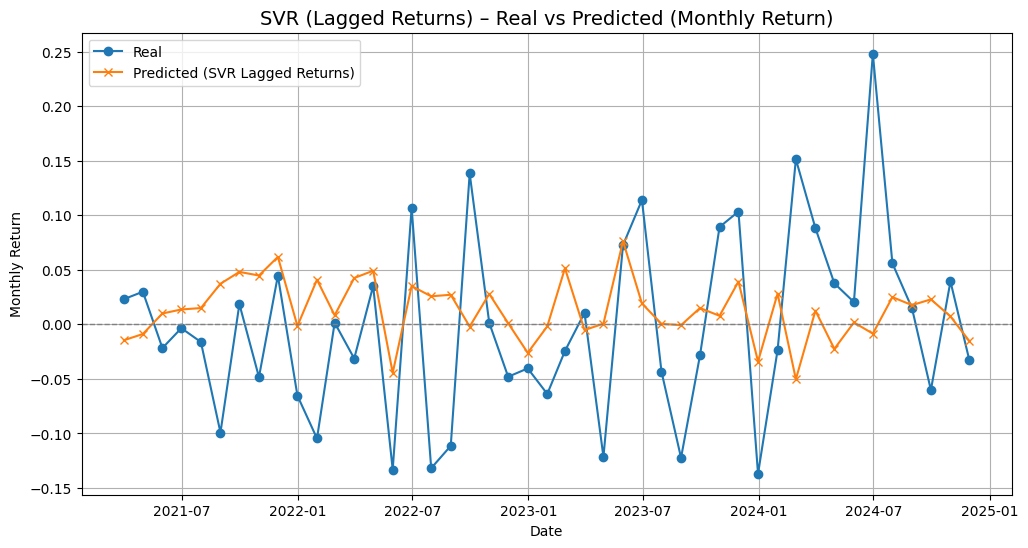

In [90]:
plt.figure(figsize=(12,6))
plt.plot(y_test_svr_l.index, y_test_svr_l.values, label='Real', marker='o')
plt.plot(y_test_svr_l.index, y_test_pred_svr_l, label='Predicted (SVR Lagged Returns)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('SVR (Lagged Returns) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


## LSTM

In [92]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [93]:
features_lstm = ['Close', 'MA20', 'MA50', 'Momentum', 'Volatility', 'RSI']
target_lstm = 'MonthlyReturn'

X_lstm = monthly_df[features_lstm]
y_lstm = monthly_df[target_lstm]

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lstm)

In [95]:
lookback = 3  # geçmiş 3 ay
def create_sequences(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:(i + lookback)])
        ys.append(y[i + lookback])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_lstm.values, lookback)


In [96]:
train_size = int(len(X_seq) * 0.7)
val_size = int(len(X_seq) * 0.15)

X_train_lstm = X_seq[:train_size]
y_train_lstm = y_seq[:train_size]

X_val_lstm = X_seq[train_size:train_size+val_size]
y_val_lstm = y_seq[train_size:train_size+val_size]

X_test_lstm = X_seq[train_size+val_size:]
y_test_lstm = y_seq[train_size+val_size:]

In [97]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(lookback, X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

history = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
13/13 [==============================] - 6s 89ms/step - loss: 0.0087 - val_loss: 0.0102
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss: 0.0084
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 0.0118
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0069
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0072
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0066
E

In [98]:
y_val_pred_lstm = model_lstm.predict(X_val_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_val_lstm, y_val_pred_lstm))
mae_lstm = mean_absolute_error(y_val_lstm, y_val_pred_lstm)
r2_lstm = r2_score(y_val_lstm, y_val_pred_lstm)
da_lstm = np.mean(np.sign(y_val_pred_lstm.flatten()) == np.sign(y_val_lstm))

print("📊 LSTM (All Features) – Validation Set")
print(f"  R²:   {r2_lstm:.4f}")
print(f"  RMSE: {rmse_lstm:.6f}")
print(f"  MAE:  {mae_lstm:.6f}")
print(f"  Directional Accuracy: {da_lstm:.4f}")

2/2 [==============================] - 1s 5ms/step
📊 LSTM (All Features) – Validation Set
  R²:   -0.8149
  RMSE: 0.087835
  MAE:  0.069839
  Directional Accuracy: 0.5116


### Hyperparameter Tuning

In [100]:
import tensorflow as tf
from itertools import product

lookback_options = [3, 6, 12]
units_options = [32, 50, 64]
dropout_options = [0.2, 0.3]
epochs_options = [50, 100]
batch_size_options = [8, 16]

best_rmse = float('inf')
best_params = None

for lookback, units, dropout, epochs, batch_size in product(
    lookback_options, units_options, dropout_options, epochs_options, batch_size_options
):
    #Sequence 
    X_seq, y_seq = create_sequences(X_scaled, y_lstm.values, lookback)
    
    #Split
    train_size = int(len(X_seq) * 0.7)
    val_size = int(len(X_seq) * 0.15)

    X_train_lstm = X_seq[:train_size]
    y_train_lstm = y_seq[:train_size]

    X_val_lstm = X_seq[train_size:train_size+val_size]
    y_val_lstm = y_seq[train_size:train_size+val_size]

    #Model
    model = Sequential()
    model.add(LSTM(units, activation='tanh', input_shape=(lookback, X_train_lstm.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    #Training
    model.fit(
        X_train_lstm, y_train_lstm,
        validation_data=(X_val_lstm, y_val_lstm),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    #Prediction
    y_val_pred = model.predict(X_val_lstm, verbose=0)
    rmse = np.sqrt(mean_squared_error(y_val_lstm, y_val_pred))

    #Best update
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = (lookback, units, dropout, epochs, batch_size)
        print(f"✅ New parameters={best_rmse:.6f} | Params={best_params}")

print("\n📌 Best parameters:")
print(f"Lookback: {best_params[0]}, Units: {best_params[1]}, Dropout: {best_params[2]}, Epochs: {best_params[3]}, Batch Size: {best_params[4]}")
print(f"Lowest RMSE: {best_rmse:.6f}")


✅ New parameters=0.080992 | Params=(3, 32, 0.2, 50, 8)
✅ New parameters=0.079183 | Params=(3, 32, 0.3, 50, 16)
✅ New parameters=0.077226 | Params=(3, 32, 0.3, 100, 8)
✅ New parameters=0.072531 | Params=(6, 32, 0.3, 50, 8)
✅ New parameters=0.070348 | Params=(6, 32, 0.3, 50, 16)

📌 Best parameters:
Lookback: 6, Units: 32, Dropout: 0.3, Epochs: 50, Batch Size: 16
Lowest RMSE: 0.070348


In [101]:
best_lookback, best_units, best_dropout, best_epochs, best_batch_size = best_params

#Sequence (lookback = best_lookback)
X_seq, y_seq = create_sequences(X_scaled, y_lstm.values, best_lookback)

#Split
train_size = int(len(X_seq) * 0.7)
val_size = int(len(X_seq) * 0.15)

X_train_val_lstm = X_seq[:train_size+val_size]
y_train_val_lstm = y_seq[:train_size+val_size]

X_test_lstm = X_seq[train_size+val_size:]
y_test_lstm = y_seq[train_size+val_size:]

#Model
model_lstm_final = Sequential()
model_lstm_final.add(LSTM(best_units, activation='tanh', input_shape=(best_lookback, X_train_val_lstm.shape[2])))
model_lstm_final.add(Dropout(best_dropout))
model_lstm_final.add(Dense(1))

model_lstm_final.compile(optimizer='adam', loss='mse')

#Training
history_final = model_lstm_final.fit(
    X_train_val_lstm, y_train_val_lstm,
    epochs=best_epochs,
    batch_size=best_batch_size,
    verbose=1
)


Epoch 1/50
16/16 [==============================] - 9s 8ms/step - loss: 0.0398
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0215
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0169
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0084
Epoch 11/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 12/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 13/50
16/16 [============================

In [102]:
y_test_pred_lstm = model_lstm_final.predict(X_test_lstm, verbose=0)

r2_lstm_final = r2_score(y_test_lstm, y_test_pred_lstm)
rmse_lstm_final = np.sqrt(mean_squared_error(y_test_lstm, y_test_pred_lstm))
mae_lstm_final = mean_absolute_error(y_test_lstm, y_test_pred_lstm)
da_lstm_final = np.mean(np.sign(y_test_pred_lstm.flatten()) == np.sign(y_test_lstm))

print("📊 LSTM (All Features) – Final Test Results")
print(f"  R²:   {r2_lstm_final:.4f}")
print(f"  RMSE: {rmse_lstm_final:.6f}")
print(f"  MAE:  {mae_lstm_final:.6f}")
print(f"  Directional Accuracy: {da_lstm_final:.4f}")

📊 LSTM (All Features) – Final Test Results
  R²:   -0.1218
  RMSE: 0.089285
  MAE:  0.072715
  Directional Accuracy: 0.5227


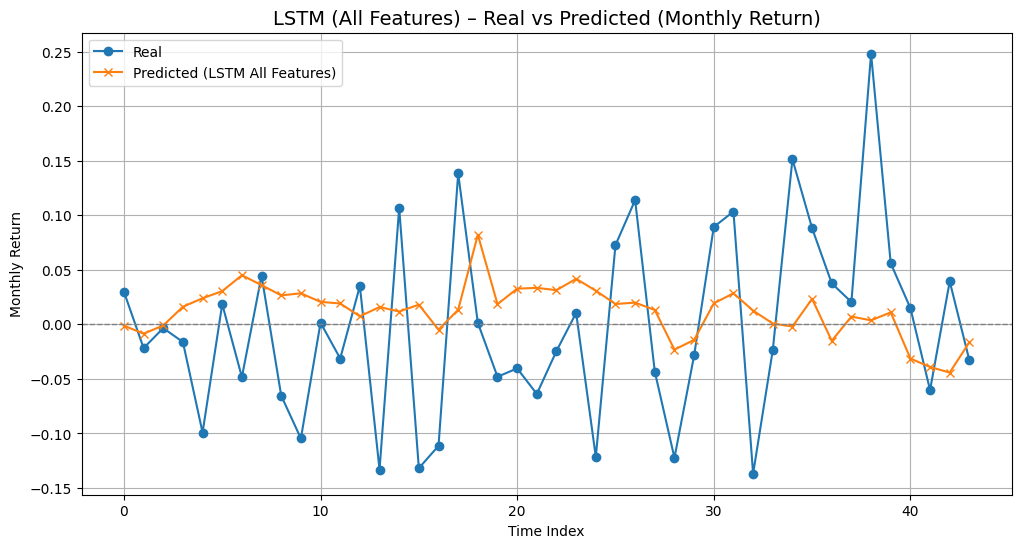

In [103]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test_lstm)), y_test_lstm, label='Real', marker='o')
plt.plot(range(len(y_test_pred_lstm)), y_test_pred_lstm, label='Predicted (LSTM All Features)', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('LSTM (All Features) – Real vs Predicted (Monthly Return)', fontsize=14)
plt.xlabel('Time Index')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()
